In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('./삼성전자_stock.csv')

In [3]:
df.head()

,Unnamed: 0,날짜,종가,전일비,시가,고가,저가,거래량
0,0,2024.04.24,78600,3100,77500,78800,77200,21804564
1,1,2024.04.23,75500,-600,76400,76800,75500,18717699
2,2,2024.04.22,76100,-1500,77400,77500,75100,30469477
3,3,2024.04.19,77600,-2000,78300,78700,76300,31317563
4,4,2024.04.18,79600,700,78800,80100,78300,21370190


In [4]:
# 필요없는 Unnamied: 0 열 삭제
df = df.drop('Unnamed: 0', axis=1)
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024.04.24,78600,3100,77500,78800,77200,21804564
1,2024.04.23,75500,-600,76400,76800,75500,18717699
2,2024.04.22,76100,-1500,77400,77500,75100,30469477
3,2024.04.19,77600,-2000,78300,78700,76300,31317563
4,2024.04.18,79600,700,78800,80100,78300,21370190
...,...,...,...,...,...,...,...
6965,1996.07.10,70600,-1100,71700,72000,70500,99200
6966,1996.07.09,71700,800,70900,71700,70100,64910
6967,1996.07.08,70900,-600,71600,71600,70800,62100
6968,1996.07.06,71500,200,71300,72700,71300,35510


In [5]:
# 결측치, dtype 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      6970 non-null   object
 1   종가      6970 non-null   int64 
 2   전일비     6970 non-null   int64 
 3   시가      6970 non-null   int64 
 4   고가      6970 non-null   int64 
 5   저가      6970 non-null   int64 
 6   거래량     6970 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 381.3+ KB


In [6]:
# 날짜 데이터 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024-04-24,78600,3100,77500,78800,77200,21804564
1,2024-04-23,75500,-600,76400,76800,75500,18717699
2,2024-04-22,76100,-1500,77400,77500,75100,30469477
3,2024-04-19,77600,-2000,78300,78700,76300,31317563
4,2024-04-18,79600,700,78800,80100,78300,21370190
...,...,...,...,...,...,...,...
6965,1996-07-10,70600,-1100,71700,72000,70500,99200
6966,1996-07-09,71700,800,70900,71700,70100,64910
6967,1996-07-08,70900,-600,71600,71600,70800,62100
6968,1996-07-06,71500,200,71300,72700,71300,35510


In [7]:
# 날짜 데이터의 dtype 확인 -> datetime형식으로 변환됨
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      6970 non-null   datetime64[ns]
 1   종가      6970 non-null   int64         
 2   전일비     6970 non-null   int64         
 3   시가      6970 non-null   int64         
 4   고가      6970 non-null   int64         
 5   저가      6970 non-null   int64         
 6   거래량     6970 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 381.3 KB


In [8]:
# pct_change행 생성 및 데이터 추가
# .pct_chage(): 두 값을 비교해서 얼마나 변했는지 퍼센트를 보여준다.

df['pct_change'] = df['종가'].pct_change(periods=-1) # periods를 조절하여 비교 간격 설정가능
df

,날짜,종가,전일비,시가,고가,저가,거래량,pct_change
0,2024-04-24,78600,3100,77500,78800,77200,21804564,0.041060
1,2024-04-23,75500,-600,76400,76800,75500,18717699,-0.007884
2,2024-04-22,76100,-1500,77400,77500,75100,30469477,-0.019330
3,2024-04-19,77600,-2000,78300,78700,76300,31317563,-0.025126
4,2024-04-18,79600,700,78800,80100,78300,21370190,0.008872
...,...,...,...,...,...,...,...,...
6965,1996-07-10,70600,-1100,71700,72000,70500,99200,-0.015342
6966,1996-07-09,71700,800,70900,71700,70100,64910,0.011283
6967,1996-07-08,70900,-600,71600,71600,70800,62100,-0.008392
6968,1996-07-06,71500,200,71300,72700,71300,35510,0.002805


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          6970 non-null   datetime64[ns]
 1   종가          6970 non-null   int64         
 2   전일비         6970 non-null   int64         
 3   시가          6970 non-null   int64         
 4   고가          6970 non-null   int64         
 5   저가          6970 non-null   int64         
 6   거래량         6970 non-null   int64         
 7   pct_change  6969 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 435.8 KB


In [10]:
df.describe()

,종가,전일비,시가,고가,저가,거래량,pct_change
count,6.970000e+03,6970.000000,6.970000e+03,6.970000e+03,6.970000e+03,6.970000e+03,6969.000000
mean,5.985879e+05,373.558106,5.974436e+05,6.040803e+05,5.907382e+05,3.694111e+06,0.000745
std,6.079793e+05,14944.856005,6.066703e+05,6.122488e+05,6.009034e+05,7.222623e+06,0.027494
min,3.330000e+04,-141000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.980415
25%,7.242500e+04,-4000.000000,7.240000e+04,7.300000e+04,7.160000e+04,2.725348e+05,-0.011966
50%,4.460000e+05,0.000000,4.475000e+05,4.525000e+05,4.407500e+05,4.809675e+05,0.000000
75%,8.737500e+05,4500.000000,8.740000e+05,8.825000e+05,8.642500e+05,1.146162e+06,0.012360
max,2.861000e+06,107000.000000,2.875000e+06,2.876000e+06,2.838000e+06,9.030618e+07,0.150000


In [11]:
# 날짜 데이터 제외 데이터 분포 확인
# count = 데이터의 총 개수
# mean = 평균
# std = 표준편차
# min = 최소
# 25% = Q1
# 50% = Q2
# 75% = Q3
# max = 최대

cols = df.columns
df[cols[1:]].describe()

,종가,전일비,시가,고가,저가,거래량,pct_change
count,6.970000e+03,6970.000000,6.970000e+03,6.970000e+03,6.970000e+03,6.970000e+03,6969.000000
mean,5.985879e+05,373.558106,5.974436e+05,6.040803e+05,5.907382e+05,3.694111e+06,0.000745
std,6.079793e+05,14944.856005,6.066703e+05,6.122488e+05,6.009034e+05,7.222623e+06,0.027494
min,3.330000e+04,-141000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.980415
25%,7.242500e+04,-4000.000000,7.240000e+04,7.300000e+04,7.160000e+04,2.725348e+05,-0.011966
50%,4.460000e+05,0.000000,4.475000e+05,4.525000e+05,4.407500e+05,4.809675e+05,0.000000
75%,8.737500e+05,4500.000000,8.740000e+05,8.825000e+05,8.642500e+05,1.146162e+06,0.012360
max,2.861000e+06,107000.000000,2.875000e+06,2.876000e+06,2.838000e+06,9.030618e+07,0.150000


In [12]:
# 시간순별  sorting
# 데이터를 크롤링할 때 최신순으로 가져오기에 오름차순으로 정렬

df = df.sort_values(by='날짜', ascending=True)
df

,날짜,종가,전일비,시가,고가,저가,거래량,pct_change
6969,1996-07-05,71300,-600,72000,72300,71000,77960,NaN
6968,1996-07-06,71500,200,71300,72700,71300,35510,0.002805
6967,1996-07-08,70900,-600,71600,71600,70800,62100,-0.008392
6966,1996-07-09,71700,800,70900,71700,70100,64910,0.011283
6965,1996-07-10,70600,-1100,71700,72000,70500,99200,-0.015342
...,...,...,...,...,...,...,...,...
4,2024-04-18,79600,700,78800,80100,78300,21370190,0.008872
3,2024-04-19,77600,-2000,78300,78700,76300,31317563,-0.025126
2,2024-04-22,76100,-1500,77400,77500,75100,30469477,-0.019330
1,2024-04-23,75500,-600,76400,76800,75500,18717699,-0.007884


# 결측치 확인


In [13]:
# np.nan값의 개수를 확인할 수 있다.
# 현재 np.nan은 없는 것으로 확인
# 다만 pct_change의 마지막 값은 비교가 없으므로 np.nan

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6970 entries, 6969 to 0
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          6970 non-null   datetime64[ns]
 1   종가          6970 non-null   int64         
 2   전일비         6970 non-null   int64         
 3   시가          6970 non-null   int64         
 4   고가          6970 non-null   int64         
 5   저가          6970 non-null   int64         
 6   거래량         6970 non-null   int64         
 7   pct_change  6969 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 490.1 KB


In [14]:
# df.isna(), df.isnull() 데이터 중 np.nan인 경우 True, 값이 있는 경우 False를 반환한다.
# sum()을 통해 더해주면 각 변수에 몇 개의 결측치가 있는지 확인할 수 있다.

print(df.isna().head())
print()
print(df.isnull().head())

         날짜     종가    전일비     시가     고가     저가    거래량  pct_change
6969  False  False  False  False  False  False  False        True
6968  False  False  False  False  False  False  False       False
6967  False  False  False  False  False  False  False       False
6966  False  False  False  False  False  False  False       False
6965  False  False  False  False  False  False  False       False

         날짜     종가    전일비     시가     고가     저가    거래량  pct_change
6969  False  False  False  False  False  False  False        True
6968  False  False  False  False  False  False  False       False
6967  False  False  False  False  False  False  False       False
6966  False  False  False  False  False  False  False       False
6965  False  False  False  False  False  False  False       False


In [15]:
df.isna().sum()

날짜            0
종가            0
전일비           0
시가            0
고가            0
저가            0
거래량           0
pct_change    1
dtype: int64

In [16]:
df.isnull().sum()

날짜            0
종가            0
전일비           0
시가            0
고가            0
저가            0
거래량           0
pct_change    1
dtype: int64

<Axes: >

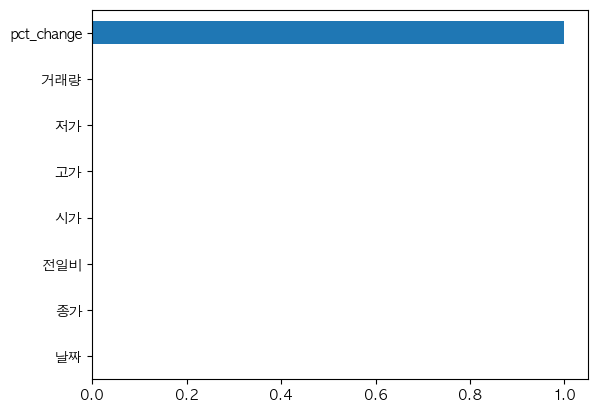

In [17]:
df_null = df.isna()
df_null.sum().plot.barh()

<Axes: >

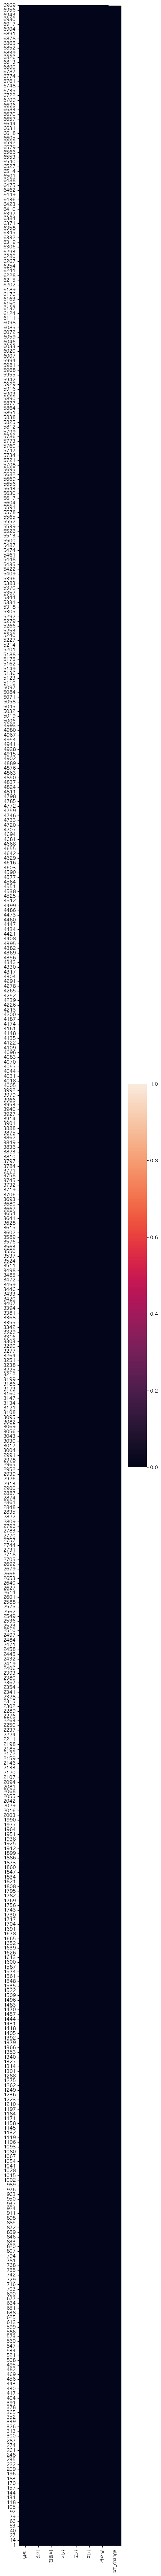

In [18]:
# heatmap으로 결측치 확인
# 결측치가 있는 경우 해당 부분이 흰색으로 표시된다.
# 현재 데이터에서 pct_change의 마지막 값이 np.nan이므로 흰색으로 표시됨

plt.figure(figsize=(5,100))
sns.heatmap(df_null)

# 그래프 시각화

- plt.figure(figsize(x, y)): 그래프의 크기 설정
- plt.plot(x_data, y_data, marker='각 지점의 형태', linestyle='각 지점을 이어주는 선 스타일', color='그래프 색상', 
           label='그래프를 여러개 그릴 때 각 그래프의 이름')
- plt.title('그래프 제목')
- plt.xlabel('x축 이름')
- plt.ylabel('y축 이름')
- plt.grid(True or False): 격자 출력 여부
- plt.xticks(rotation=x): 축 데이터 표시할 때 기울기
- plt.legend(): 그래프의 label추가
- plt.show(): 그래프 출력

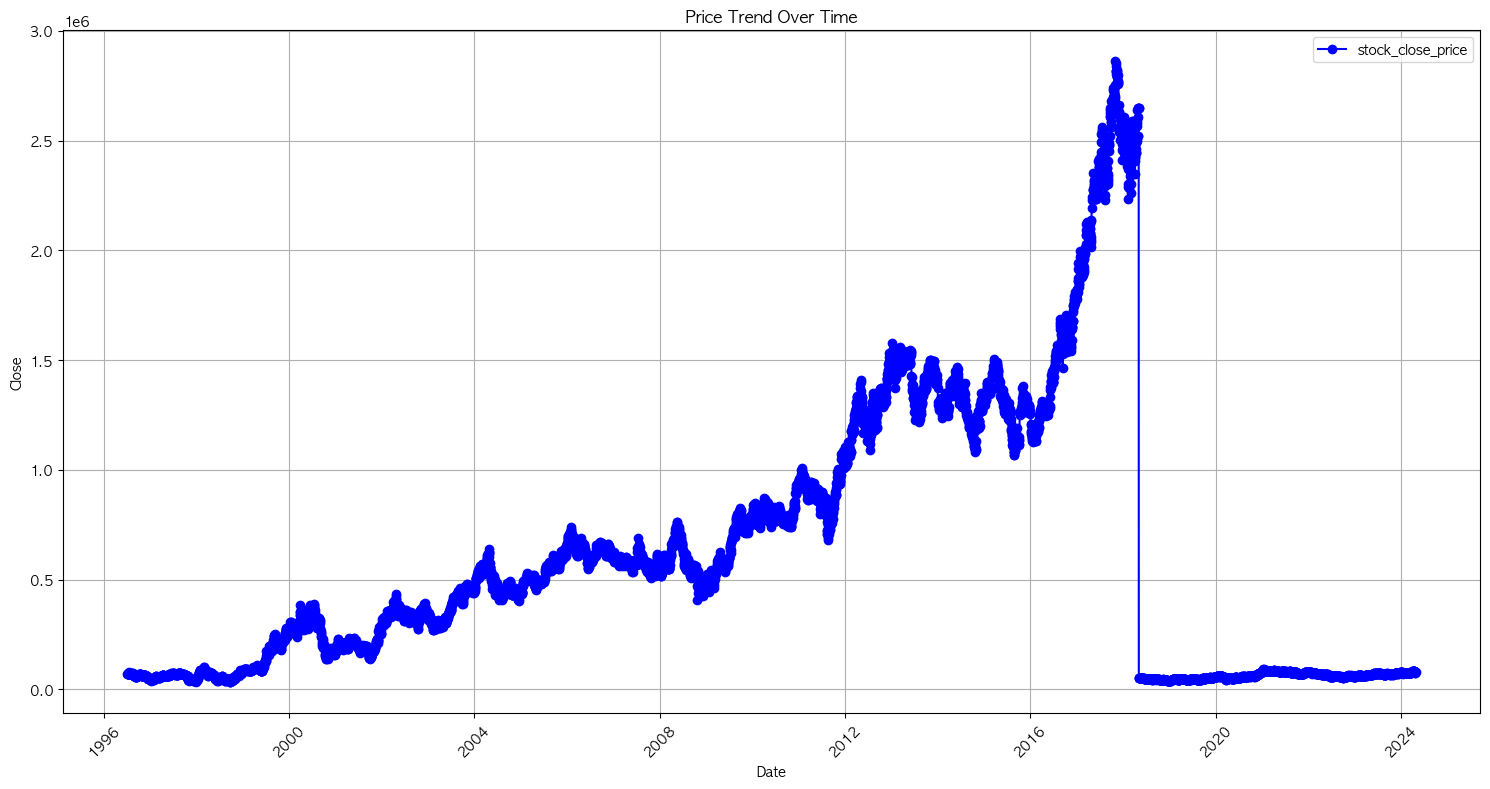

In [19]:
# 종가 그래프 시각화
# 특정 지점에서 크게 변한 것을 확인할 수 있다.

plt.figure(figsize=(15, 8)) # 그래프 크기 설정
plt.plot(df['날짜'], df['종가'], marker='o', linestyle='-', color='b', label='stock_close_price') # 각 날짜에 종가 표현
plt.title('Price Trend Over Time') # 그래프 제목
plt.xlabel('Date') # x축 label
plt.ylabel('Close') # y축 label
plt.grid(True) # 격자 표시
plt.xticks(rotation=45) # x축 label 표시할 때 45도 돌린다는 의미
plt.tight_layout()
plt.legend()
plt.show()

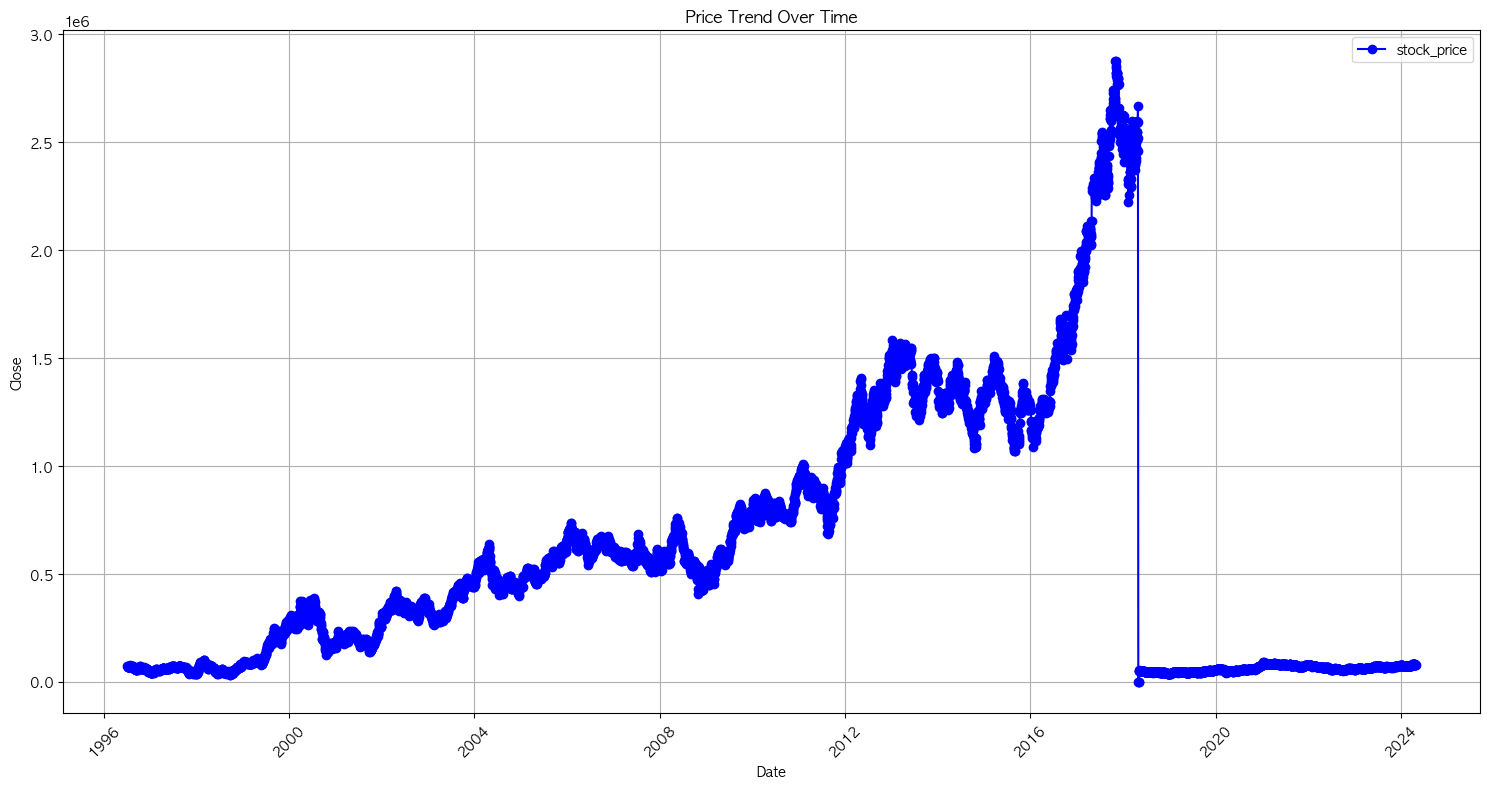

In [20]:
# 시가 그래프 시각화
# 특정 지점에서 크게 변한 것을 확인할 수 있다.

plt.figure(figsize=(15, 8)) # 그래프 크기 설정
plt.plot(df['날짜'], df['시가'], marker='o', linestyle='-', color='b', label='stock_price') # 각 날짜에 종가 표현
plt.title('Price Trend Over Time') # 그래프 제목
plt.xlabel('Date') # x축 label
plt.ylabel('Close') # y축 label
plt.grid(True) # 격자 표시
plt.xticks(rotation=45) # x축 label 표시할 때 45도 돌린다는 의미
plt.tight_layout()
plt.legend()
plt.show()

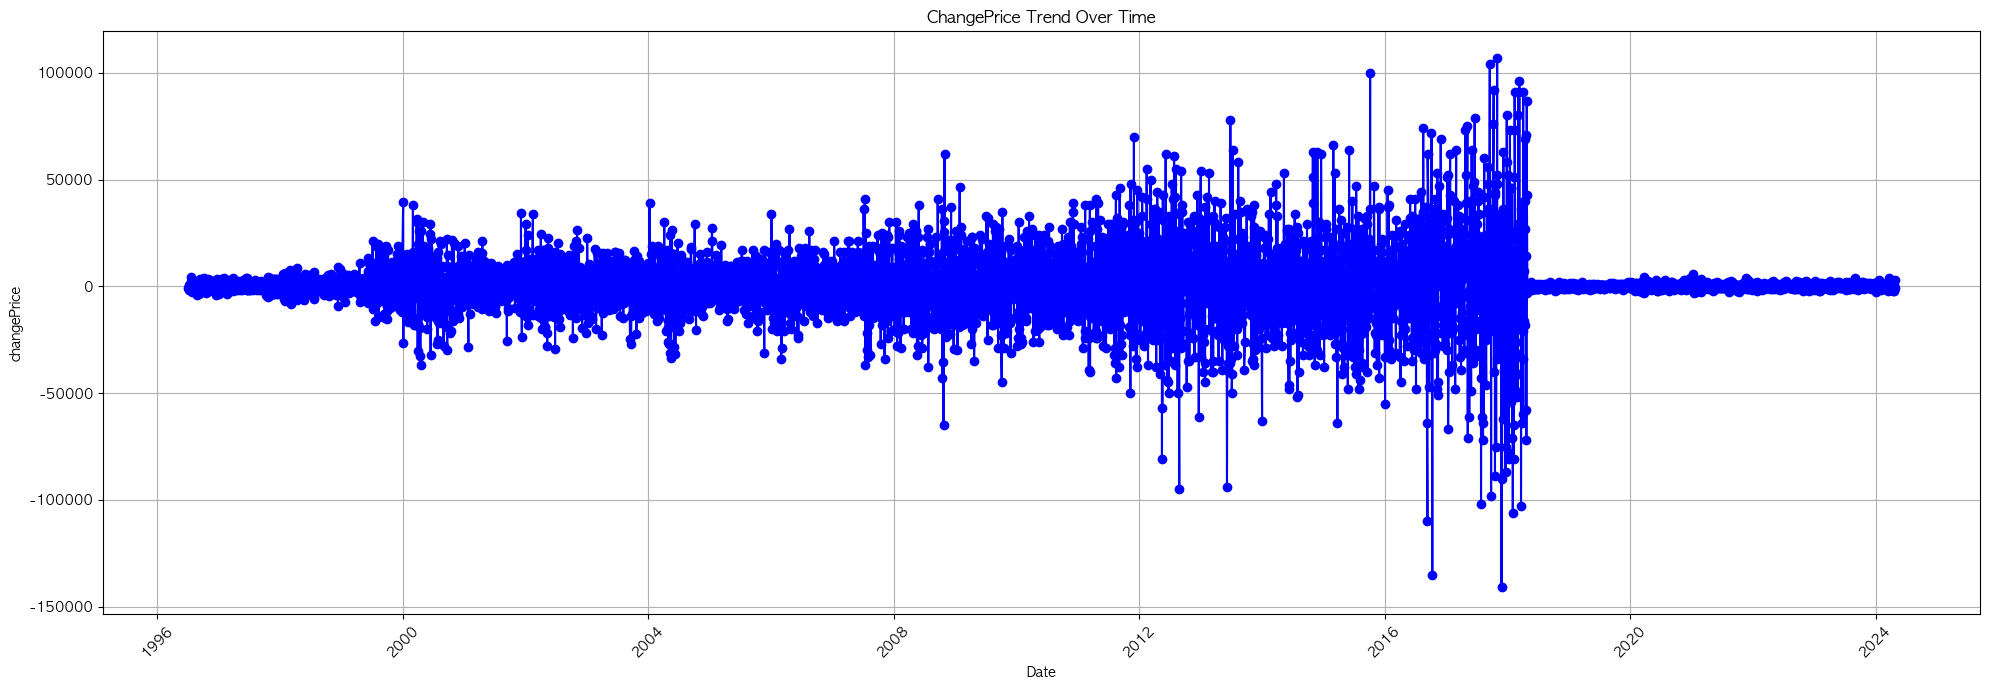

In [21]:
# 전일대비 상승, 하락 퍼센트 시각화 

plt.figure(figsize=(20,7))
plt.plot(df['날짜'], df['전일비'], marker='o', linestyle='-', color='b')
plt.title('ChangePrice Trend Over Time')
plt.xlabel('Date')
plt.ylabel('changePrice')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()

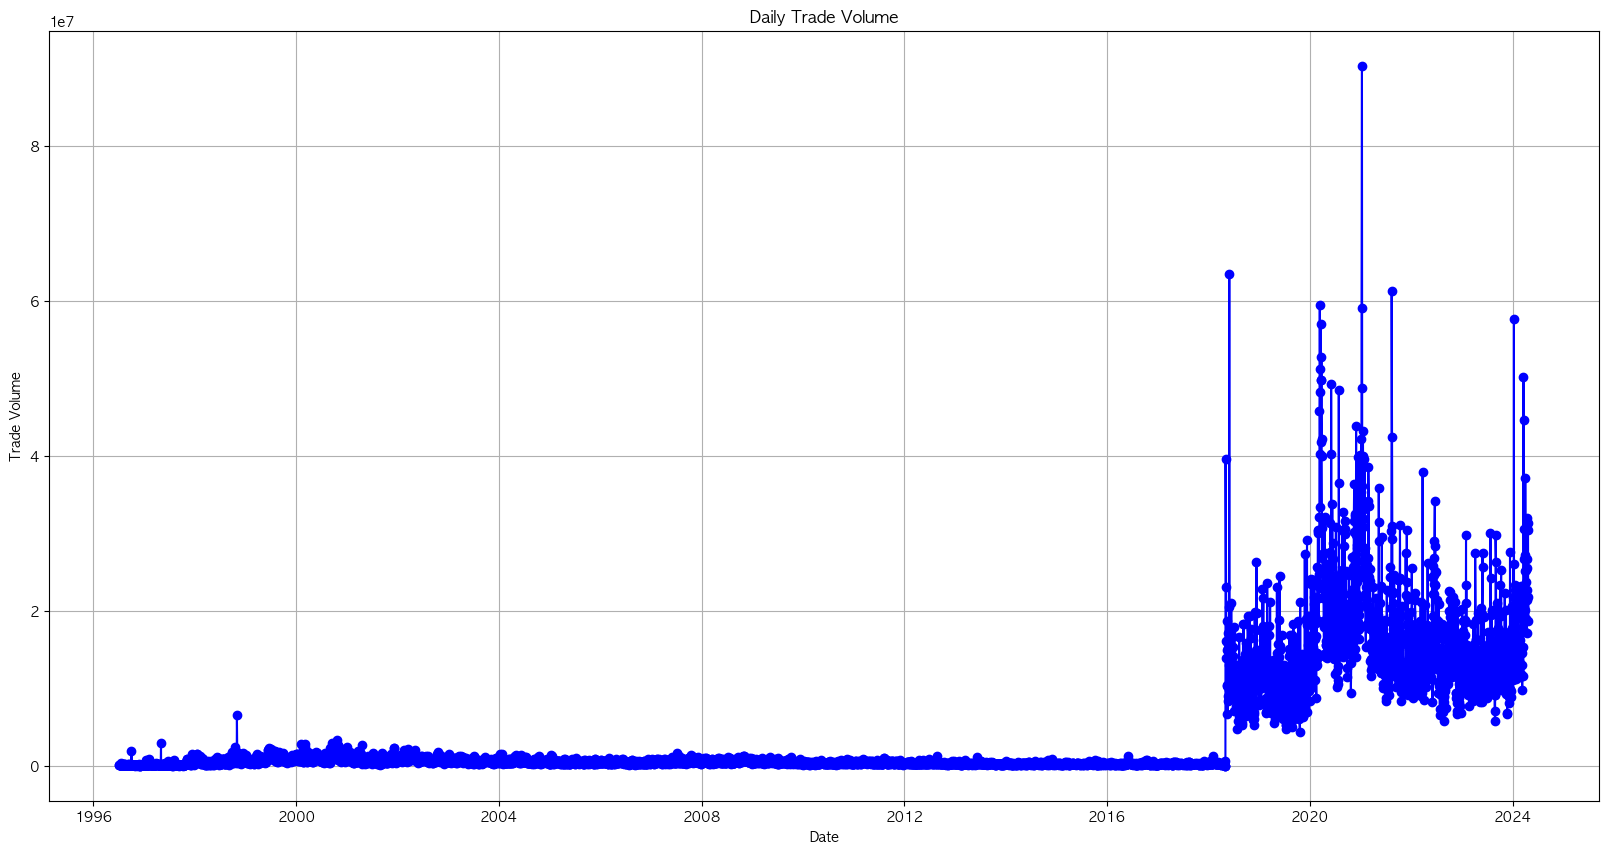

In [22]:
# 거래량 시각화

plt.figure(figsize=(20, 10))
plt.plot(df['날짜'], df['거래량'], marker='o', linestyle='-', color='b', label='trade volume')
plt.title("Daily Trade Volume")
plt.xlabel('Date')
plt.ylabel('Trade Volume')
plt.grid(True)
plt.show()

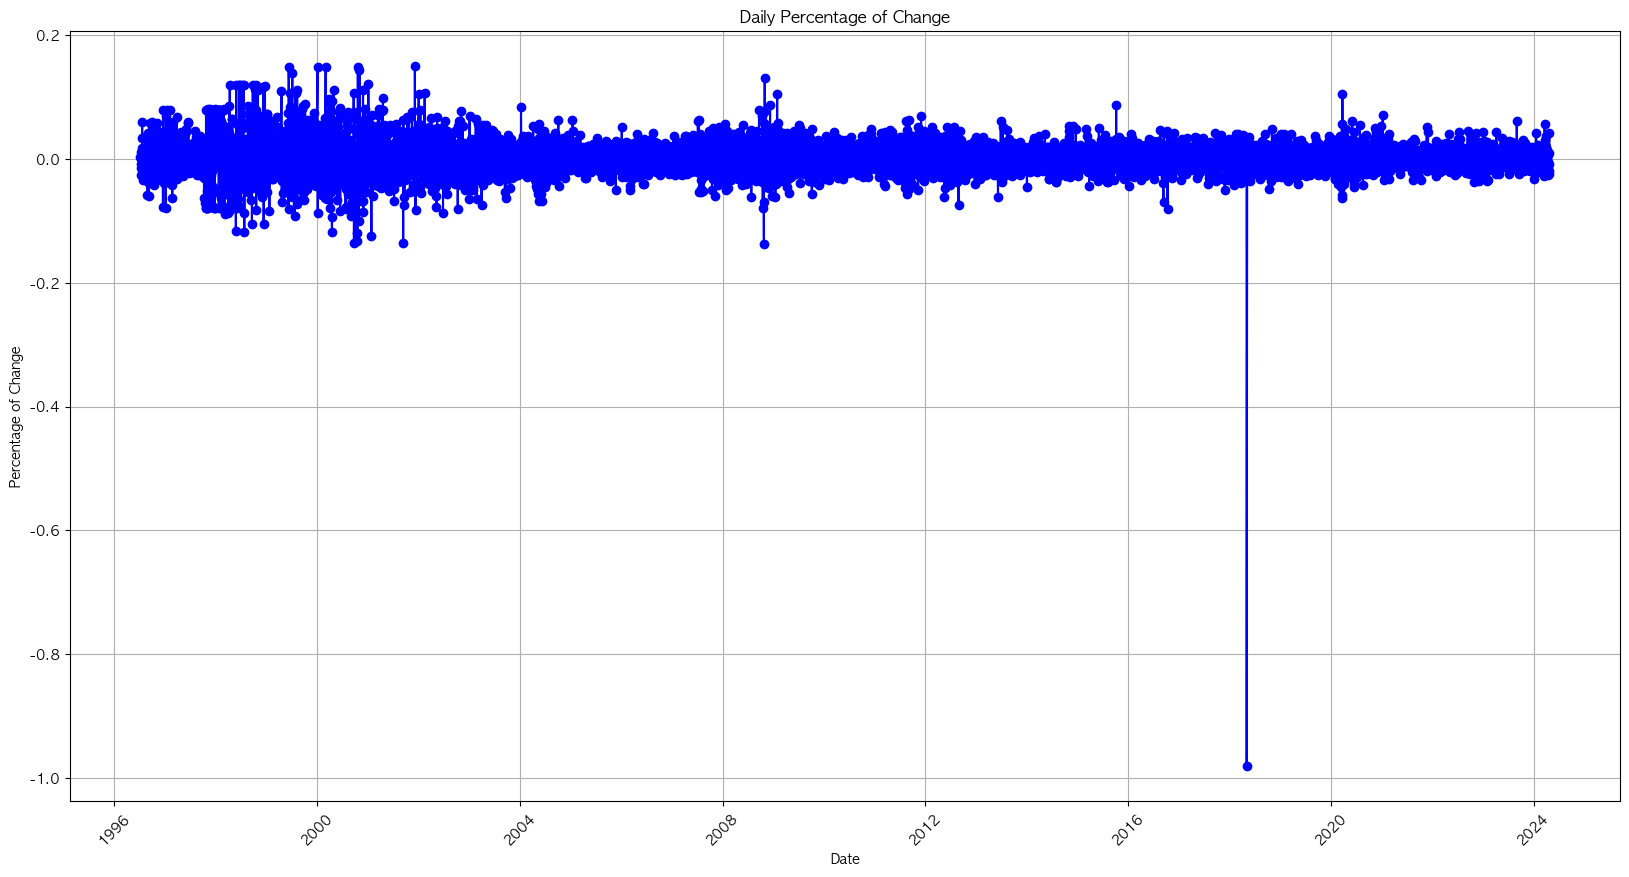

In [23]:
# 변화량 그래프 시각화
# 특정 지점에서 큰 폭으로 변한 것을 확인할 수 있다.

plt.figure(figsize=(20, 10))
plt.plot(df['날짜'], df['pct_change'], marker='o', linestyle='-', color='b')
plt.title("Daily Percentage of Change")
plt.xlabel('Date')
plt.ylabel('Percentage of Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_19889/1796507408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['종가'])


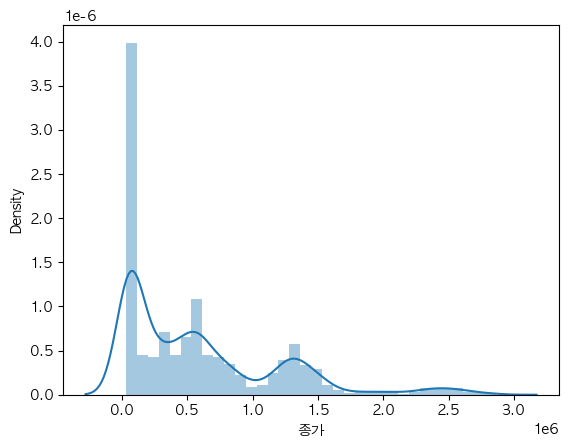

In [24]:
sns.distplot(df['종가'])
plt.show()

In [25]:
df_after = df[df['날짜']>'2023-01-01']
df_after

,날짜,종가,전일비,시가,고가,저가,거래량,pct_change
322,2023-01-02,55500,200,55500,56100,55200,10031448,0.003617
321,2023-01-03,55400,-100,55400,56000,54500,13547030,-0.001802
320,2023-01-04,57800,2400,55700,58000,55600,20188071,0.043321
319,2023-01-05,58200,400,58200,58800,57600,15682826,0.006920
318,2023-01-06,59000,800,58300,59400,57900,17334989,0.013746
...,...,...,...,...,...,...,...,...
4,2024-04-18,79600,700,78800,80100,78300,21370190,0.008872
3,2024-04-19,77600,-2000,78300,78700,76300,31317563,-0.025126
2,2024-04-22,76100,-1500,77400,77500,75100,30469477,-0.019330
1,2024-04-23,75500,-600,76400,76800,75500,18717699,-0.007884


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_19889/409188892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_after['종가'])


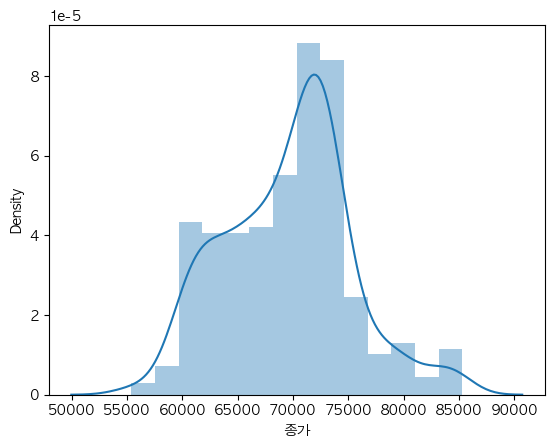

In [26]:
sns.distplot(df_after['종가'])
plt.show()

# 다중공선성 확인
- 상관계수가 크면 다른 변수에의해 설명된다는 것이므로 학습시에 필요가 없다.
- 변수를 제거하는 것이 학습에 유리

In [27]:
# 숫자형 열만 선택
# 1. select_dtype()을 통해 특정 데이터타입으로 구성된 열을 가져온다.
# 2. 데이터의 형태를 알고있고 특정 열만 데이터타입이 다른 경우 drop()함수를 사용한다.

# 1번 방법 사용
# 날짜 행이 없어진 것을 확인할 수 있다.
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
numeric_columns

,종가,전일비,시가,고가,저가,거래량,pct_change
6969,71300,-600,72000,72300,71000,77960,NaN
6968,71500,200,71300,72700,71300,35510,0.002805
6967,70900,-600,71600,71600,70800,62100,-0.008392
6966,71700,800,70900,71700,70100,64910,0.011283
6965,70600,-1100,71700,72000,70500,99200,-0.015342
...,...,...,...,...,...,...,...
4,79600,700,78800,80100,78300,21370190,0.008872
3,77600,-2000,78300,78700,76300,31317563,-0.025126
2,76100,-1500,77400,77500,75100,30469477,-0.019330
1,75500,-600,76400,76800,75500,18717699,-0.007884


In [28]:
# 2번 방법 사용
numeric_columns2 = df.drop('날짜', axis=1)
numeric_columns2

,종가,전일비,시가,고가,저가,거래량,pct_change
6969,71300,-600,72000,72300,71000,77960,NaN
6968,71500,200,71300,72700,71300,35510,0.002805
6967,70900,-600,71600,71600,70800,62100,-0.008392
6966,71700,800,70900,71700,70100,64910,0.011283
6965,70600,-1100,71700,72000,70500,99200,-0.015342
...,...,...,...,...,...,...,...
4,79600,700,78800,80100,78300,21370190,0.008872
3,77600,-2000,78300,78700,76300,31317563,-0.025126
2,76100,-1500,77400,77500,75100,30469477,-0.019330
1,75500,-600,76400,76800,75500,18717699,-0.007884


In [29]:
# 상관행렬 계산
# 두 변수 사이의 상관관계가 클수록 값이 커진다.
# 즉, 한 변수가 다른 변수에 의해 설명이 가능하다는 뜻

corr_matrix = numeric_columns.corr()
corr_matrix

,종가,전일비,시가,고가,저가,거래량,pct_change
종가,1.000000,0.043122,0.995702,0.995814,0.995827,-0.407174,0.009413
전일비,0.043122,1.000000,0.027326,0.034642,0.034892,-0.009329,0.575800
시가,0.995702,0.027326,1.000000,0.999907,0.999912,-0.407080,0.000576
고가,0.995814,0.034642,0.999907,1.000000,0.999907,-0.407737,0.004858
저가,0.995827,0.034892,0.999912,0.999907,1.000000,-0.406458,0.004503
거래량,-0.407174,-0.009329,-0.407080,-0.407737,-0.406458,1.000000,-0.020208
pct_change,0.009413,0.575800,0.000576,0.004858,0.004503,-0.020208,1.000000


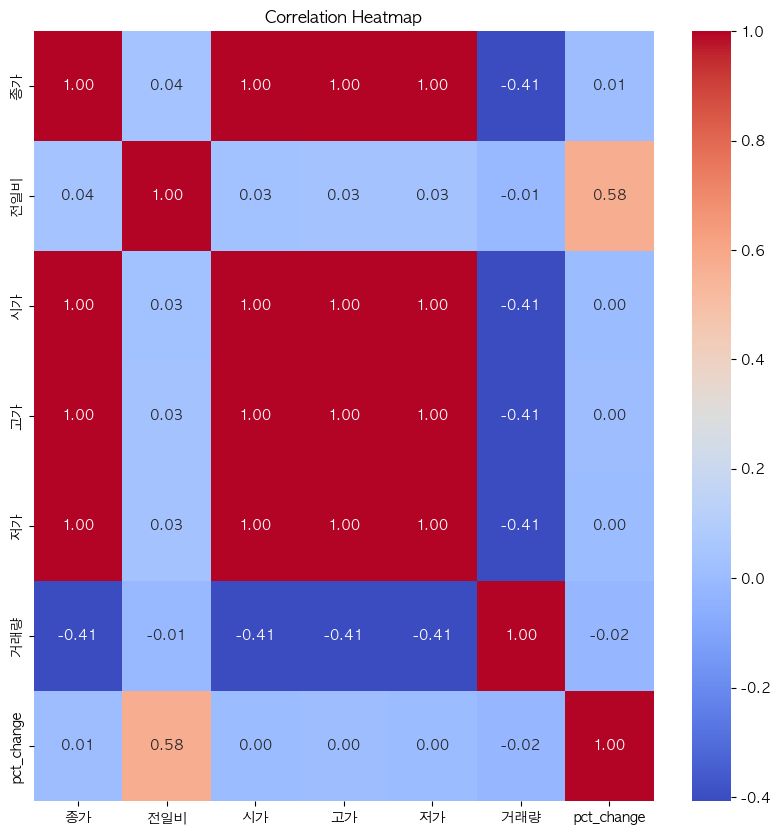

In [30]:
# 히트맵 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

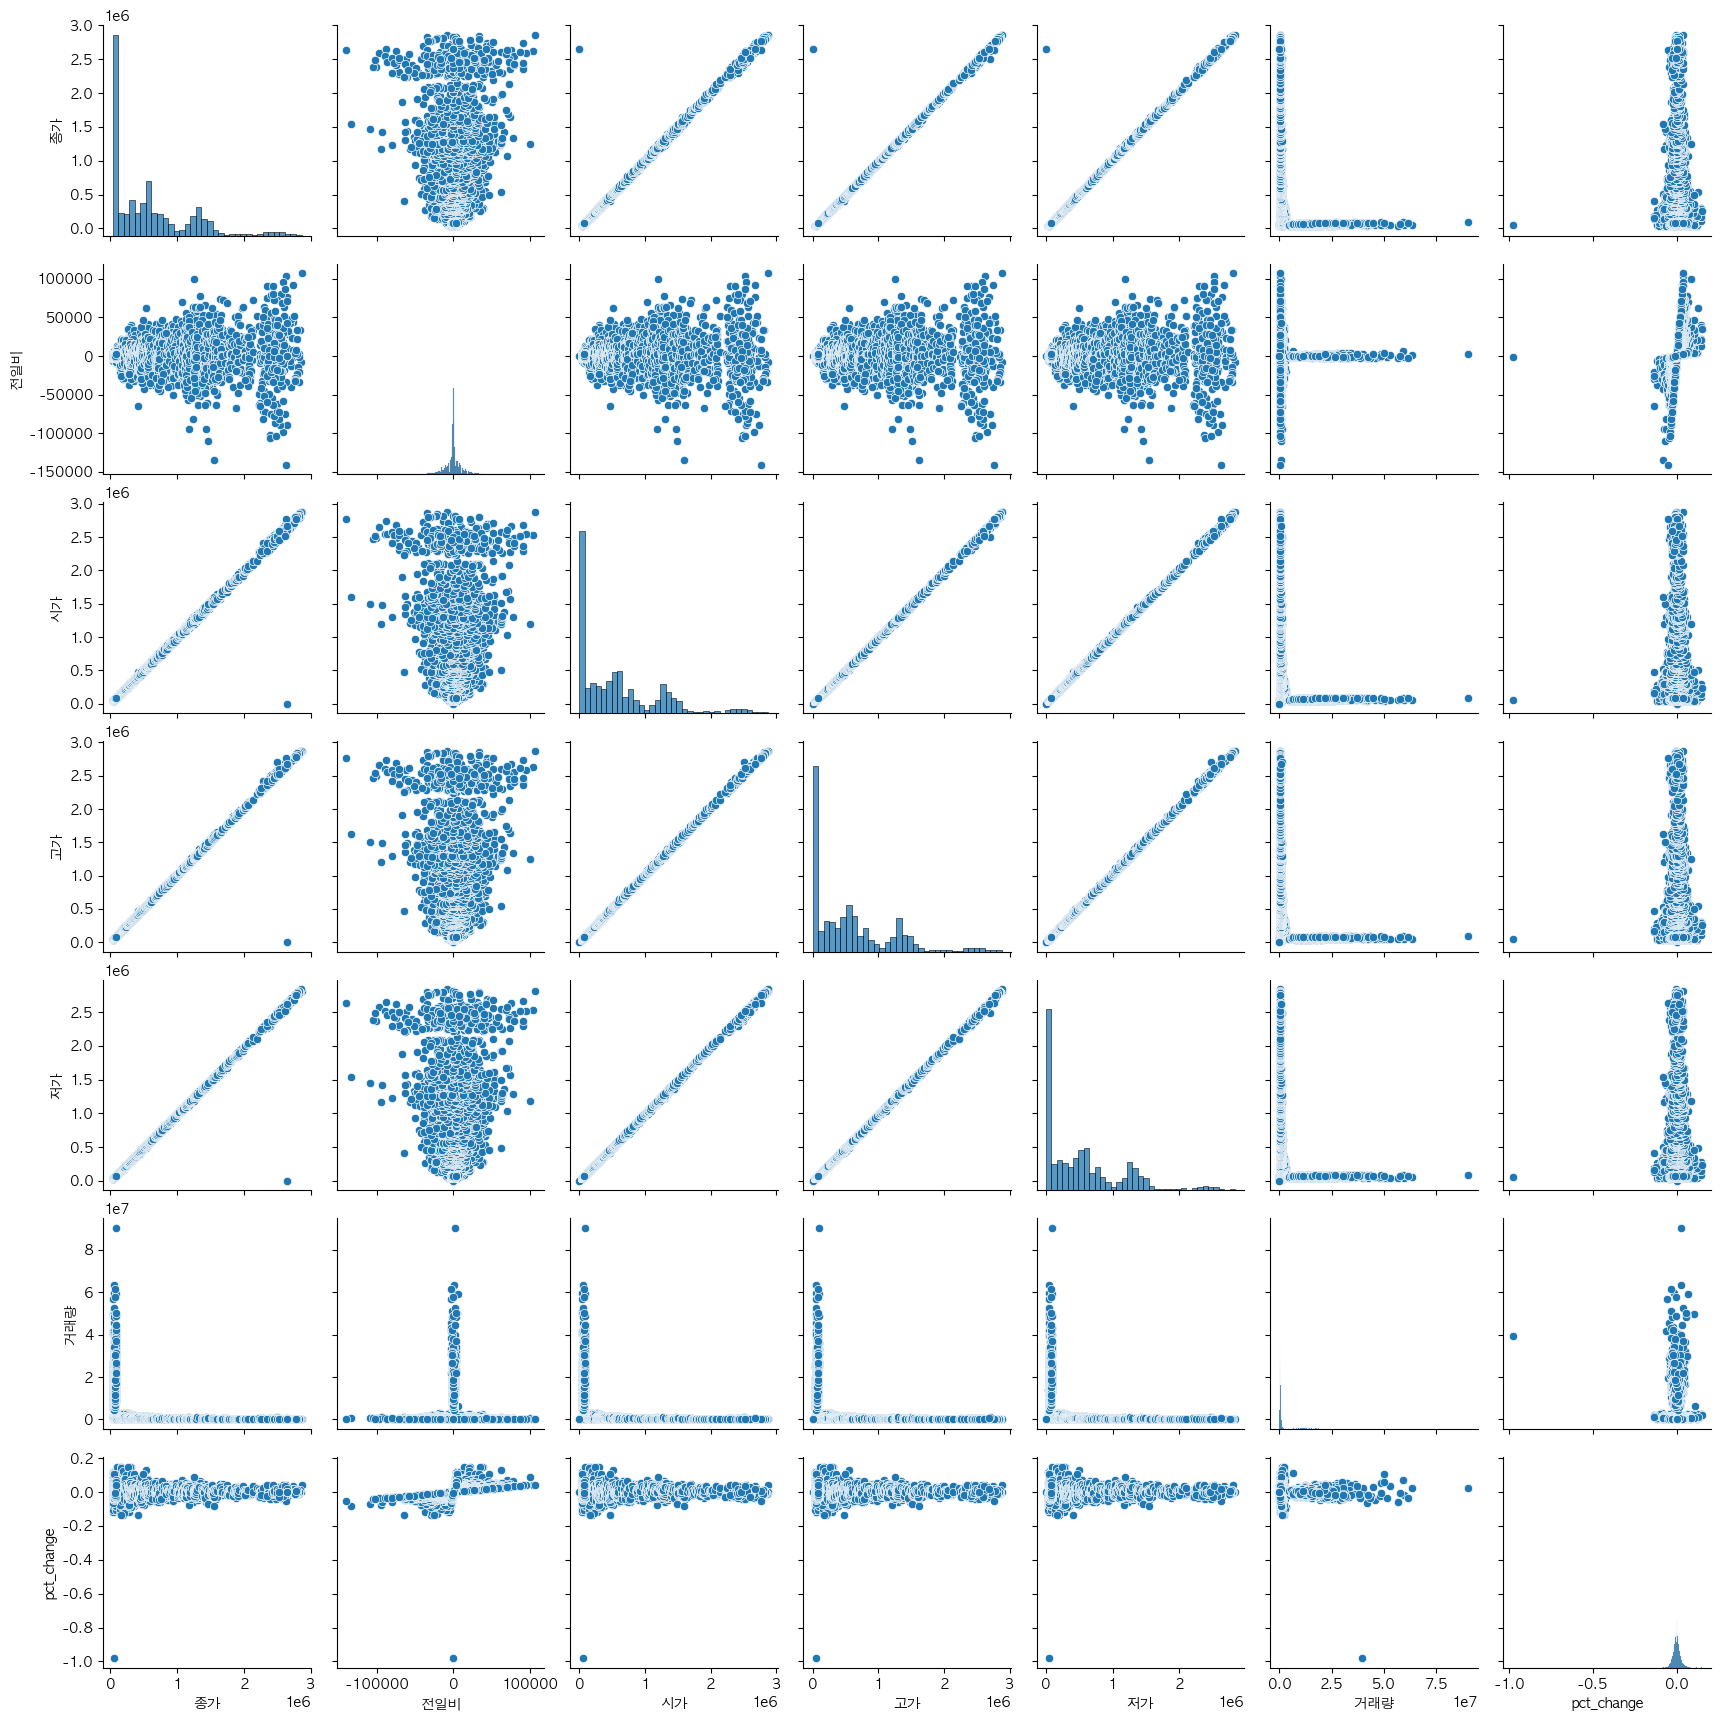

In [31]:
# 두 변수의 상관관계를 그래프로 확인
# 대각선 형태로 나오는 경우 상관관계가 크다고 볼 수 있다.

sns.pairplot(df)
plt.show()

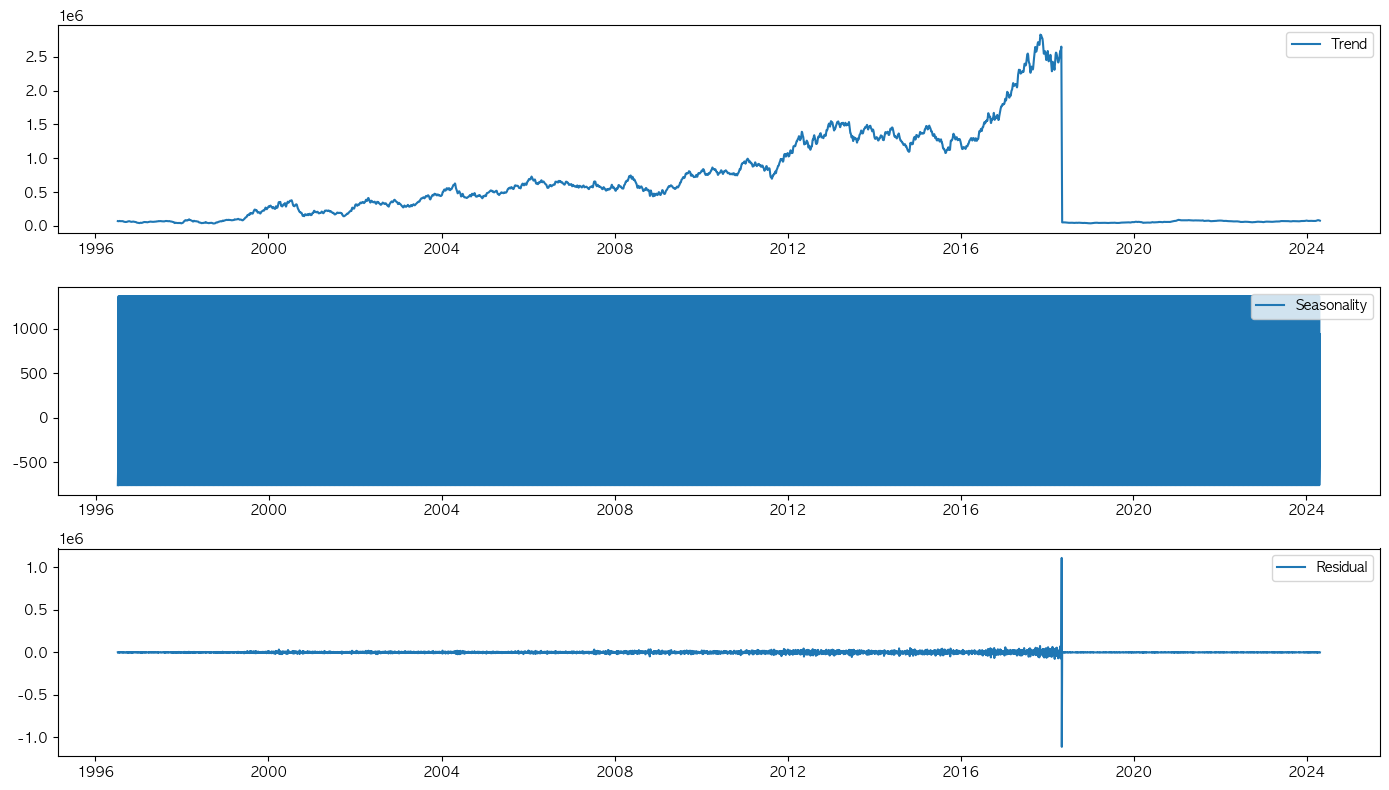

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 출판 날짜 설정,  빈도 일별('D')로 설정
ts_data = df.set_index('날짜').resample('D').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해.
decomposition = seasonal_decompose(ts_data['종가'], model='additive')

# 시각화
plt.figure(figsize=(14, 8))

# 트렌드(Trend)
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성(Seasonality)
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

# 이상치 처리
- '종가', '시가' 그래프 확인시 갑자기 값이 확 튀는 경우가 있다.
- 해당 값이 잘못된 것일 수도 있지만 삼성의 경우 당시 액면가 분할이 있었기에 주가가 급격히 변했을 것이다.
- 기초적인 방법(평균, 최빈 등의 값으로 대체)으로 이상치를 처리할 경우 잘못된 예측 모델이 생성된다.
- 해결 방법을 찾아야된다.

In [33]:
from copy import deepcopy

In [34]:
df_new = deepcopy(df)
df_new

,날짜,종가,전일비,시가,고가,저가,거래량,pct_change
6969,1996-07-05,71300,-600,72000,72300,71000,77960,NaN
6968,1996-07-06,71500,200,71300,72700,71300,35510,0.002805
6967,1996-07-08,70900,-600,71600,71600,70800,62100,-0.008392
6966,1996-07-09,71700,800,70900,71700,70100,64910,0.011283
6965,1996-07-10,70600,-1100,71700,72000,70500,99200,-0.015342
...,...,...,...,...,...,...,...,...
4,2024-04-18,79600,700,78800,80100,78300,21370190,0.008872
3,2024-04-19,77600,-2000,78300,78700,76300,31317563,-0.025126
2,2024-04-22,76100,-1500,77400,77500,75100,30469477,-0.019330
1,2024-04-23,75500,-600,76400,76800,75500,18717699,-0.007884


In [35]:
df_new = df_new.sort_values('날짜', ascending=False)
df_new

,날짜,종가,전일비,시가,고가,저가,거래량,pct_change
0,2024-04-24,78600,3100,77500,78800,77200,21804564,0.041060
1,2024-04-23,75500,-600,76400,76800,75500,18717699,-0.007884
2,2024-04-22,76100,-1500,77400,77500,75100,30469477,-0.019330
3,2024-04-19,77600,-2000,78300,78700,76300,31317563,-0.025126
4,2024-04-18,79600,700,78800,80100,78300,21370190,0.008872
...,...,...,...,...,...,...,...,...
6965,1996-07-10,70600,-1100,71700,72000,70500,99200,-0.015342
6966,1996-07-09,71700,800,70900,71700,70100,64910,0.011283
6967,1996-07-08,70900,-600,71600,71600,70800,62100,-0.008392
6968,1996-07-06,71500,200,71300,72700,71300,35510,0.002805


In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6970 entries, 0 to 6969
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          6970 non-null   datetime64[ns]
 1   종가          6970 non-null   int64         
 2   전일비         6970 non-null   int64         
 3   시가          6970 non-null   int64         
 4   고가          6970 non-null   int64         
 5   저가          6970 non-null   int64         
 6   거래량         6970 non-null   int64         
 7   pct_change  6969 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 490.1 KB


In [37]:
df_new.drop('날짜', axis=1).describe()

,종가,전일비,시가,고가,저가,거래량,pct_change
count,6.970000e+03,6970.000000,6.970000e+03,6.970000e+03,6.970000e+03,6.970000e+03,6969.000000
mean,5.985879e+05,373.558106,5.974436e+05,6.040803e+05,5.907382e+05,3.694111e+06,0.000745
std,6.079793e+05,14944.856005,6.066703e+05,6.122488e+05,6.009034e+05,7.222623e+06,0.027494
min,3.330000e+04,-141000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.980415
25%,7.242500e+04,-4000.000000,7.240000e+04,7.300000e+04,7.160000e+04,2.725348e+05,-0.011966
50%,4.460000e+05,0.000000,4.475000e+05,4.525000e+05,4.407500e+05,4.809675e+05,0.000000
75%,8.737500e+05,4500.000000,8.740000e+05,8.825000e+05,8.642500e+05,1.146162e+06,0.012360
max,2.861000e+06,107000.000000,2.875000e+06,2.876000e+06,2.838000e+06,9.030618e+07,0.150000


In [38]:
df_new[np.abs(df_new['pct_change'])>0.5]

,날짜,종가,전일비,시가,고가,저가,거래량,pct_change
1470,2018-05-04,51900,-1100,53000,53900,51800,39565391,-0.980415


In [39]:
df_new[df_new['날짜']=='2018-04-30']

,날짜,종가,전일비,시가,고가,저가,거래량,pct_change
1473,2018-04-30,2650000,0,0,0,0,0,0.0
